Life expectancy and GDP workbook 

Overview

Personal
This is my first solo, from scratch project in Python

Project
The goal is to analyze life expectancy and GDP and make beautiful diagrams. 
The dataset is made up of four columns
    - Country - of these are 6 seperate countries
    - Year - over 16 years - 2000 till 2015
    - Life expectancy
    - GDP

*Initial questions:*
Descriptive analysis over all 6 countries 
How does life expectency change over the years 
How do life expectancy and GDP correlate 
Have some countries higher life expectancy accounting for GDP 
Regression analysis for GDP 

Learnings



In [472]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import math

df = pd.read_csv("all_data.csv")


print("Columns")
print(df.columns)
print("Head")
print(df.head())

print("Info")
print(df.info()) # Check for missing data
#print("Describe")
#print(df.describe())
print("Value counts")
print(df.value_counts())
print("Shape")
print(df.shape)
print("Dtypes")
print(df.dtypes)
print("nunqie")
print(df.nunique())
print(df)




Columns
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
Head
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), ob

Cleaning some data

In [473]:
df.columns = ["country", "year", "life_exp", "gdp"]
df= df.replace(["United States of America"],["USA"])
print(df.head())
print(df.tail())
print(df.nunique())

  country  year  life_exp           gdp
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10
     country  year  life_exp           gdp
91  Zimbabwe  2011      54.9  1.209845e+10
92  Zimbabwe  2012      56.6  1.424249e+10
93  Zimbabwe  2013      58.0  1.545177e+10
94  Zimbabwe  2014      59.2  1.589105e+10
95  Zimbabwe  2015      60.7  1.630467e+10
country      6
year        16
life_exp    69
gdp         96
dtype: int64


1) Descriptive analysis over all 6 countries using boxplot


Babies born in Zimbabwe between 2000 and 2015 have an average life expectancy of 50.09375000000001
Babies born in China between 2000 and 2015 have an average life expectancy of 74.26249999999999
Babies born in Mexico between 2000 and 2015 have an average life expectancy of 75.71875
Babies born in USA between 2000 and 2015 have an average life expectancy of 78.0625
Babies born in Chile between 2000 and 2015 have an average life expectancy of 78.94374999999998
Babies born in Germany between 2000 and 2015 have an average life expectancy of 79.65625


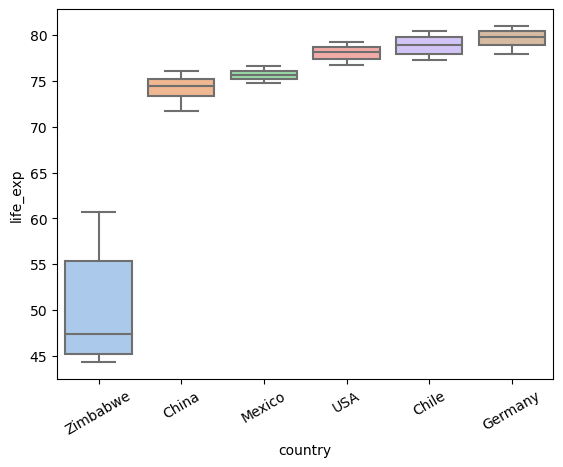

In [474]:
order_life_exp = ["Zimbabwe", "China", "Mexico", "USA", "Chile", "Germany"]
sns.boxplot(x ="country", y ="life_exp", palette ="pastel", data =df, order = order_life_exp)
plt.xticks(rotation=30, fontsize=10)
for index_country in order_life_exp:
    print("Babies born in {Country} between 2000 and 2015 have an average life expectancy of {years}".format(Country = index_country, years = df[df["country"] == index_country].life_exp.mean()))

Zimbabwe has by far the lowest life_expectancy and the largest range thus pointing to changes within these 16 years 

Germany has the highest life expectancy, but all other states are not far apart.

Let's explore how total GDP influences life expectancy


/Users/helios-mammut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


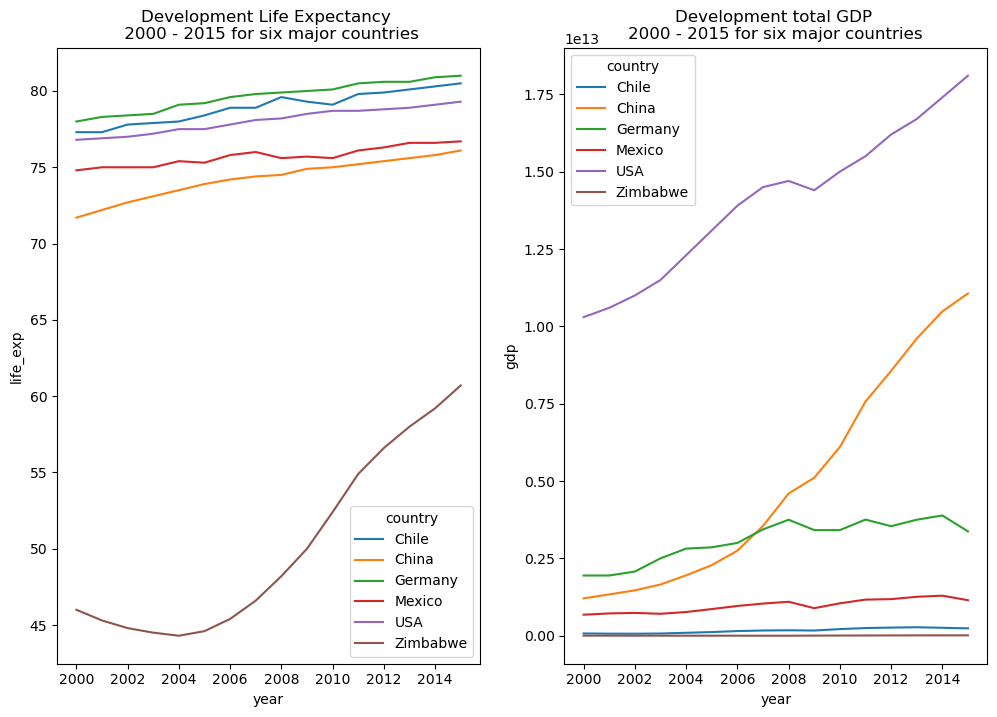

<AxesSubplot:xlabel='gdp', ylabel='life_exp'>

<Figure size 640x480 with 0 Axes>

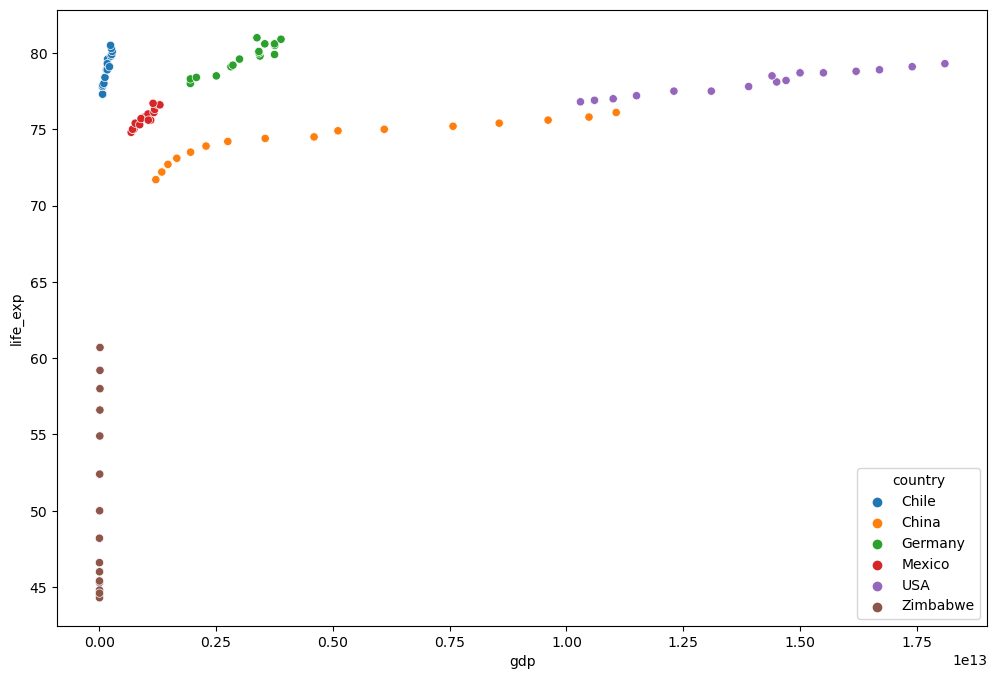

In [475]:
#for country in order_life_exp:

plt.figure(figsize = (12,8))
ax1 = plt.subplot(1,2,1)
sns.lineplot("year", "life_exp", hue = "country", data = df)
plt.title("Development Life Expectancy \n 2000 - 2015 for six major countries")

ax2 = plt.subplot(1,2,2)
sns.lineplot(x = "year",y = "gdp", hue = "country", data = df)
plt.title("Development total GDP \n2000 - 2015 for six major countries")
plt.show()
plt.clf()

plt.figure(figsize = (12,8))
sns.scatterplot(x = "gdp", y = "life_exp", data = df, hue= "country")


We see that life expectancy increases every year except for Zimbabwe. 

We cannot clearly make a connection between GDP and life expectancy, as especially for smaller countries, it is not as visible. 
We see, that Zimbabwe's and even Chile's GDP barely moves, because it is total GDP, and their inhabitants, but also starting position is much lower. thus the way forward are: 

 - A) We could either look at each of them seperately, and post GDP vs life expectancy side by side 
 - B) We could use  logarithmic scale - later version
 - C) We could look at GDP per capita - This we'll explore later, as we need an additional dataset.  
 

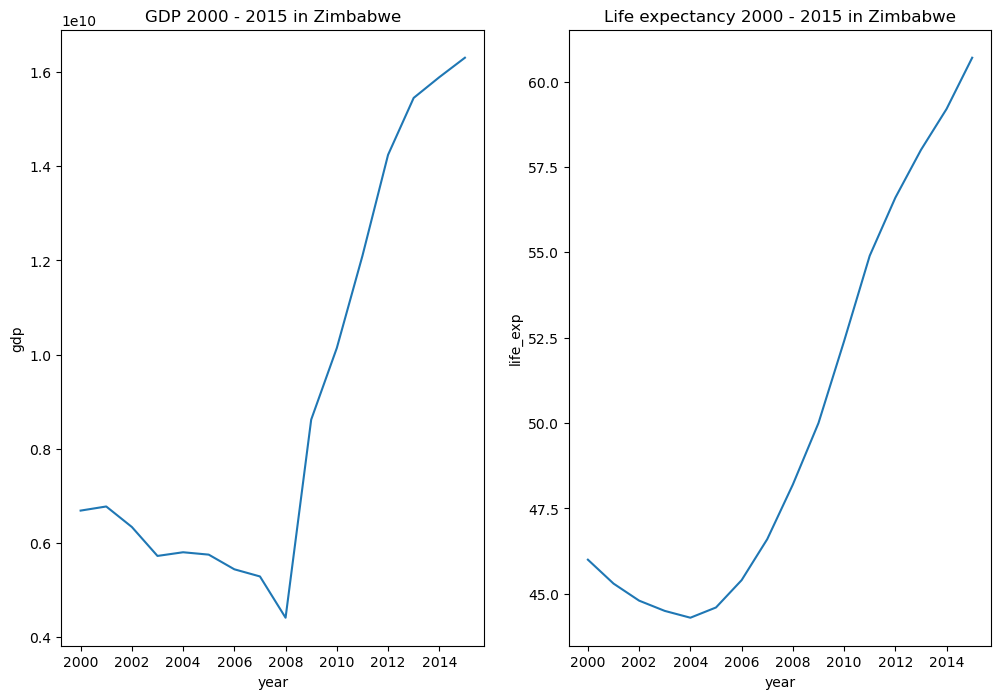

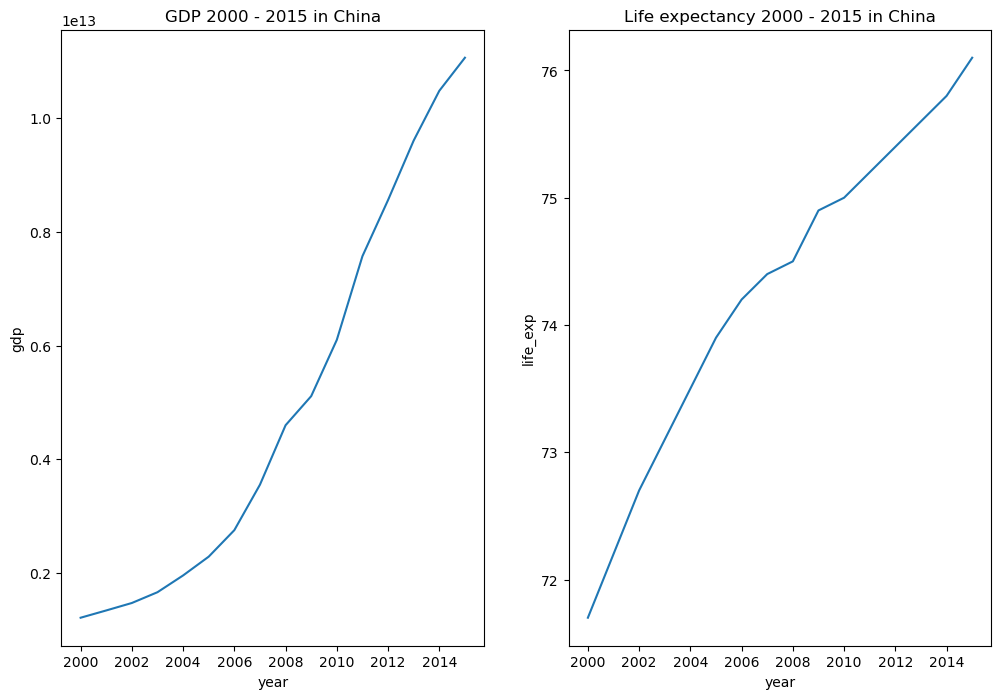

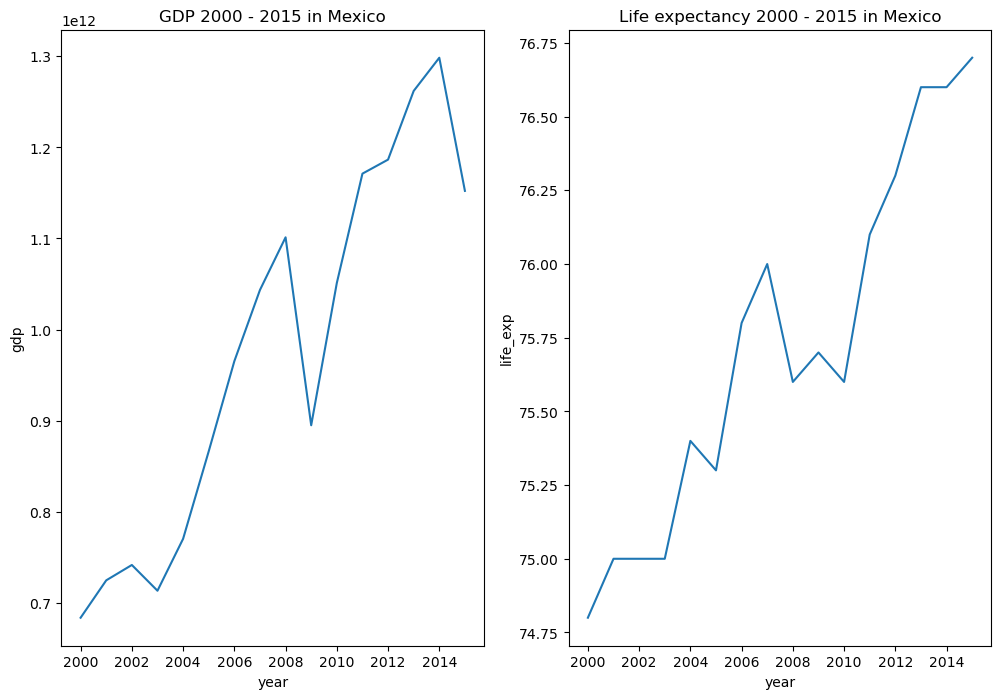

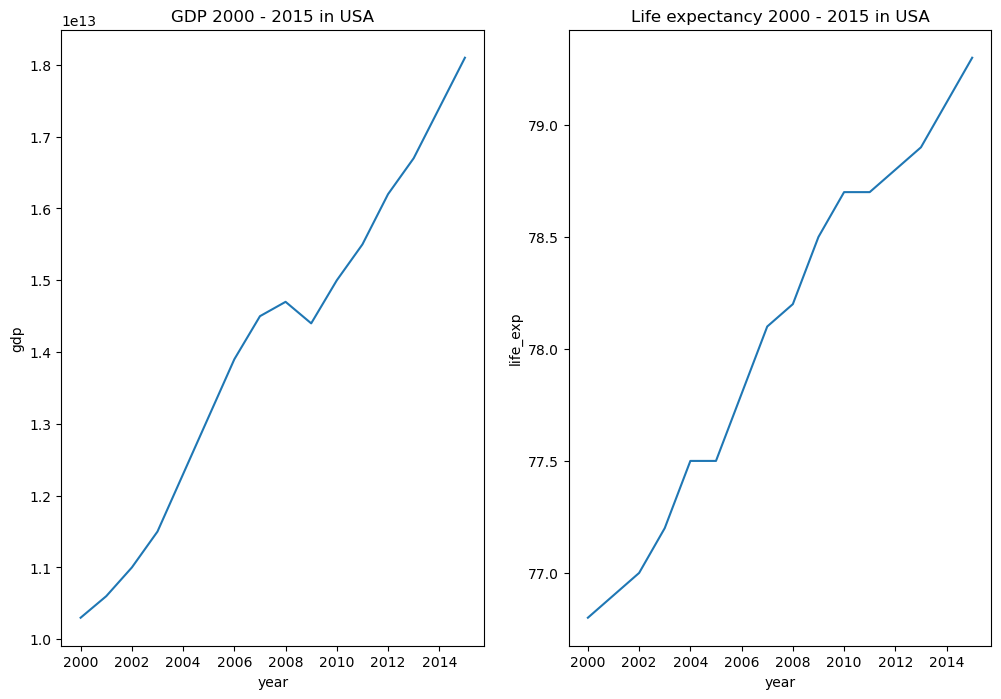

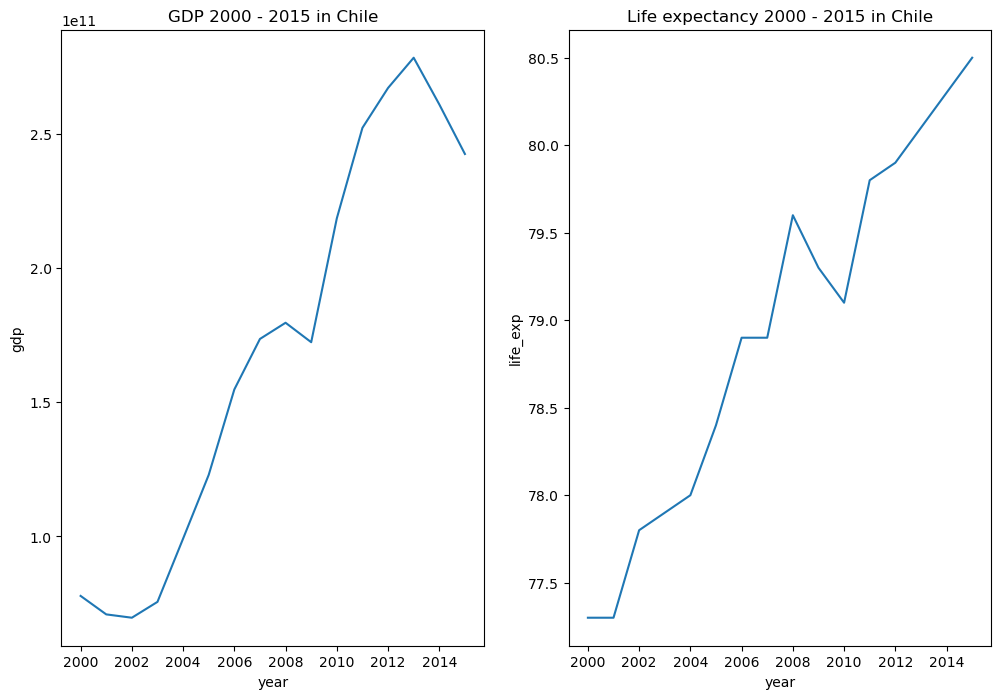

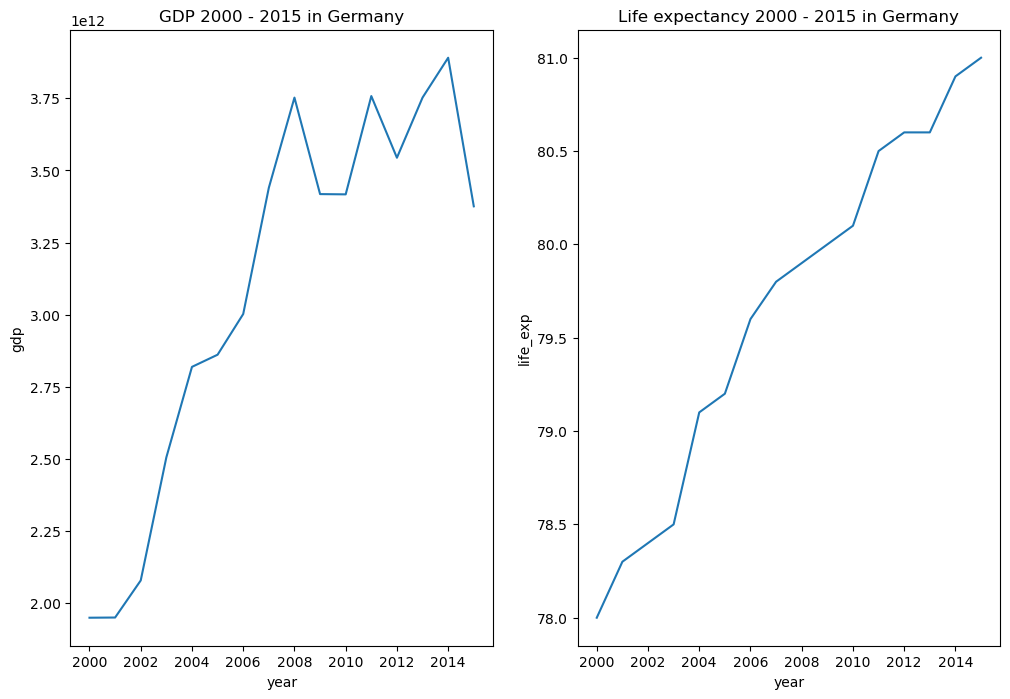

In [476]:
df_chile = df["country"] =="Zimbabwe"
df_zimbabwe = df["country"] =="Chile"
for index_country in order_life_exp:
    plt.figure(figsize = (12,8))
    ax_gdp= plt.subplot(1,2,1)
    sns.lineplot(x = "year", y= "gdp", data = df[df["country"]==index_country])
    plt.title("GDP 2000 - 2015 in {}".format(index_country))
    ax_life_exp= plt.subplot(1,2,2)
    sns.lineplot(x= "year", y= "life_exp", data = df[df["country"]==index_country])
    plt.title("Life expectancy 2000 - 2015 in {}".format(index_country))
    plt.show()
    plt.clf


B) We could use  logarithmic scale - This will be done at a later stage, as comparison is already clear through side by side pictures


C) We could look at GDP per capita - This we'll explore later, as we need an additional dataset.

     country  year   gdp_per_cap
0   Zimbabwe  2000   1696.753262
1   Zimbabwe  2001   1715.056207
2   Zimbabwe  2002   1558.546886
3   Zimbabwe  2003   1290.655624
4   Zimbabwe  2004   1211.888118
..       ...   ...           ...
91   Germany  2011   39977.34171
92   Germany  2012  40069.353956
93   Germany  2013  40135.015832
94   Germany  2014   40851.16173
95   Germany  2015  41103.256436

[96 rows x 3 columns]
<bound method NDFrame.head of      country  year  gdp_per_cap  life_exp           gdp
0      China  2000  2193.892991      71.7  1.211350e+12
1      China  2001  2359.568217      72.2  1.339400e+12
2      China  2002  2557.887094      72.7  1.470550e+12
3      China  2003  2797.171718      73.1  1.660290e+12
4      China  2004  3061.827764      73.5  1.955350e+12
..       ...   ...          ...       ...           ...
91  Zimbabwe  2011  1248.729206      54.9  1.209845e+10
92  Zimbabwe  2012  1432.305854      56.6  1.424249e+10
93  Zimbabwe  2013  1435.062663      58.0  1.54

/var/folders/3y/kf3qlnbx58v3jnwys2pc89_r0000gn/T/ipykernel_38761/3928138351.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_gdp_pc = pd.read_csv("GDP_pc.csv", ";")


<AxesSubplot:xlabel='gdp_per_cap', ylabel='life_exp'>

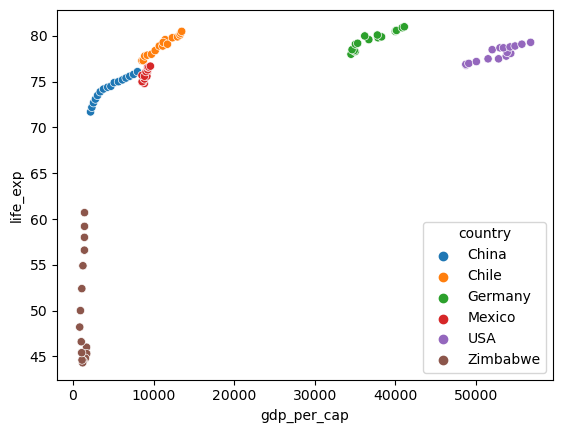

In [566]:
df_gdp_pc = pd.read_csv("GDP_pc.csv", ";")

#Rename and transpose columns and values to fit to main dataframe
df_gdp_pc = df_gdp_pc.rename(columns = {"Country Name":"country"})
df_gdp_pc = df_gdp_pc.replace({"United States": "USA"})
df_gdp_pc = df_gdp_pc.T.reset_index()
#print(df_gdp_pc)

#New header
new_header = df_gdp_pc.iloc[0] #grab the first row for the header
df_gdp_pc = df_gdp_pc[1:] #take the data less the header row
df_gdp_pc.columns = new_header


#Use a subset with only the relevant countries
df_gdp_pc = df_gdp_pc[["country", "Zimbabwe", "China", "Mexico", "USA", "Chile", "Germany"]]

#Rename column and drop nas
df_gdp_pc = df_gdp_pc.rename(columns = {"country":"year"})
df_gdp_pc = df_gdp_pc.dropna(axis=0)

#Melt, to prepare for merging and put in same structure and datatypes
df_gdp_pc_melt = pd.melt(frame=df_gdp_pc, id_vars="year", value_vars=["Zimbabwe", "China", "Mexico", "USA", "Chile", "Germany"], var_name ="country", value_name ="gdp_per_cap")
df_gdp_pc_melt = df_gdp_pc_melt[["country", "year", "gdp_per_cap"]]
df_gdp_pc_melt.year = df_gdp_pc_melt.year.astype(int)

#Merge
df = pd.merge(df, df_gdp_pc_melt)
#Make scatterplot
sns.scatterplot(x = "gdp_per_cap", y= "life_exp", data = df, hue= "country")


Finally we want to look at correlations:

In [567]:
for index_country in order_life_exp:
    data = df[df["country"]==index_country]
    #print(data)
    correlation = st.pearsonr(data.life_exp, data.gdp_per_cap)
    print("The correlation between GDP per capita and life expectancy in {Country} is {Correlation} with a p-value of {P_value}".format(Country = index_country, Correlation = correlation[0], P_value = correlation[1] ))

The correlation between GDP per capita and life expectancy in Zimbabwe is 0.1458284101353658 with a p-value of 0.5899616160543074
The correlation between GDP per capita and life expectancy in China is 0.9531419065696101 with a p-value of 1.1746288248853766e-08
The correlation between GDP per capita and life expectancy in Mexico is 0.855350742892178 with a p-value of 2.4025775378163824e-05
The correlation between GDP per capita and life expectancy in USA is 0.8975543098663377 with a p-value of 2.4128737574231084e-06
The correlation between GDP per capita and life expectancy in Chile is 0.9831364838050678 with a p-value of 9.946811878949522e-12
The correlation between GDP per capita and life expectancy in Germany is 0.9396791771808948 with a p-value of 6.637335050552204e-08


Thus, there is a strong correlation in all countries except of Zimbabwe.

Zimbabwe probably has other factors affecting its rising life expectancy. It also has by far the biggest increase 33% or, 15 years bottom to top.